In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wyp = pd.read_csv('./data_02/wyp2018_enriched.csv')
df = pd.read_csv('./data_02/wyp2018_enriched.csv')
sta = pd.read_csv('./data_01/stacje_2018.csv')


In [24]:
wyp.sample(3)

,Unnamed: 0,bike_num,start_time,end_time,departure,return,duration_sec,start_day,start_month,start_hour,start_minute,month_day,duration_min,duration_hour,which_day,daynumber,is_weekend,is_free,shop,trasa
105101,105101,58629,2018-07-19 07:29:23,2018-07-19 07:35:45,Ligota Dworzec PKP,Ligota Medyków,382,19,7,7,29,2018-07-19,6.366667,0,3,200,0,0,2,Ligota Dworzec PKP - Ligota Medyków
167994,167994,58783,2018-09-22 22:05:21,2018-09-22 22:20:55,Załęże Skwer S. Barei,Ul. Powstańców - Biblioteka Śląska,934,22,9,22,5,2018-09-22,15.566667,0,5,265,1,0,2,Załęże Skwer S. Barei - Ul. Powstańców - Bibli...
47262,47262,58387,2018-05-22 15:00:39,2018-05-22 15:28:29,Silesia Business Park,Bogucice Szpital,1670,22,5,15,0,2018-05-22,27.833333,0,1,142,0,0,2,Silesia Business Park - Bogucice Szpital


# Część 2.1

### 2.1: Średnia liczba wypożyczeń dla miesięcy

In [25]:
wyp.groupby('start_month')['bike_num'].count().sort_values(ascending=False)

start_month
8     33383
6     31346
7     29780
5     29087
4     28018
9     19649
10    13640
11     7100
12     1325
Name: bike_num, dtype: int64

In [26]:
months = wyp.groupby('start_month')['bike_num'].count().sort_values(ascending=False)

In [27]:
type(months)

pandas.core.series.Series

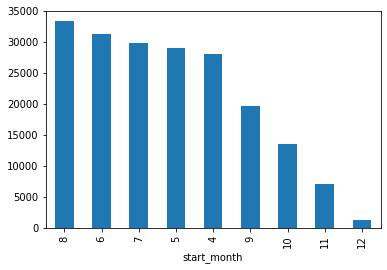

In [28]:
# wykres w matpoltlib

months.plot.bar();

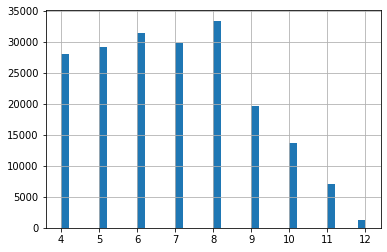

In [29]:
# histogram

wyp['start_month'].hist(bins=40);

In [30]:
# Wykres plotly

import plotly.graph_objects as go

#create a FIgure like with matplotlib
fig = go.Figure()

#add trace - plot, scatter or bar
fig.add_trace(go.Bar(
                x = months.index,
                y = months.values)
             )

#show the figure
fig.show()

### 2.1: Średnia liczba wypożyczeń dla dni tygodnia

In [31]:
# kolumna z słownymi nazwami dni tygodnia zamiast cyfr
wyp['day_of_week'] = pd.to_datetime(wyp['start_time']).dt.day_name()

In [32]:
days = wyp.groupby('day_of_week')['bike_num'].count().sort_values(ascending=False)

In [33]:
days

day_of_week
Sunday       28947
Wednesday    28485
Monday       27830
Thursday     27525
Tuesday      27139
Friday       26707
Saturday     26695
Name: bike_num, dtype: int64

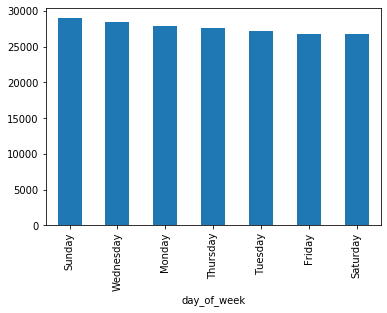

In [34]:
days.plot.bar();

### 2.1: Średni czas  wypożyczeń dla dni tygodnia

In [35]:
days_m = wyp.groupby('day_of_week')['duration_sec'].mean()/60

In [36]:
days_m

day_of_week
Friday       25.322796
Monday       24.944834
Saturday     38.389923
Sunday       46.337777
Thursday     27.012118
Tuesday      24.743949
Wednesday    25.270150
Name: duration_sec, dtype: float64

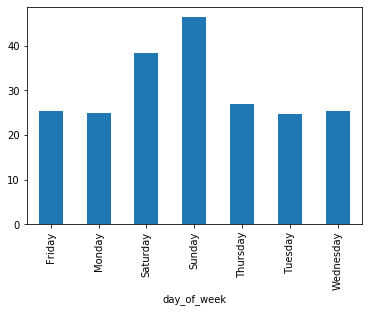

In [37]:
days_m.plot.bar();

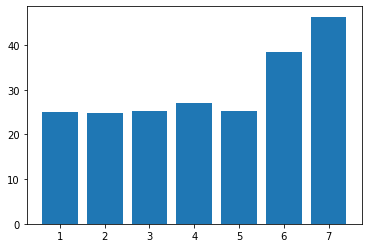

In [38]:
# wersja alternatywna
plt.bar([1,2,3,4,5,6,7],wyp.groupby('which_day')['duration_min'].mean());

### 2.1: Średnia liczba wypożyczeń godzinowo w ciągu doby

In [39]:
hours_m = wyp.groupby('start_hour')['duration_min'].mean()

In [40]:
hours_m

start_hour
0     23.084188
1     19.952961
2     18.610886
3     18.953986
4     19.469753
5     14.270879
6     11.649024
7     12.857533
8     15.645083
9     23.483390
10    33.974485
11    40.883135
12    39.572172
13    38.329105
14    35.023454
15    31.379479
16    31.515640
17    35.109561
18    34.699138
19    31.617230
20    26.531081
21    24.209169
22    24.029594
23    23.058736
Name: duration_min, dtype: float64

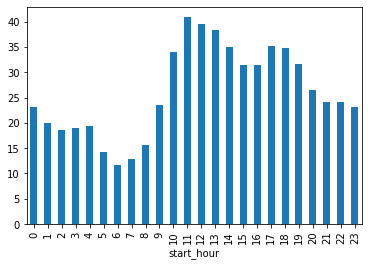

In [41]:
hours_m.plot.bar();

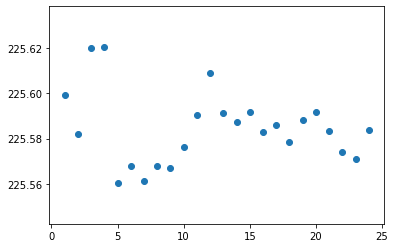

In [42]:
# wersja alternatywna
plt.scatter(list(np.arange(1,25,1)),wyp.groupby('start_hour')['bike_num'].mean().apply(lambda x : x/260));

In [43]:
#hours_c = wyp.groupby('start_hour')['duration_min'].count()/wyp['duration_min']

In [44]:
#hours_c

# Część 2.2

In [45]:
df.head(3)

,Unnamed: 0,bike_num,start_time,end_time,departure,return,duration_sec,start_day,start_month,start_hour,start_minute,month_day,duration_min,duration_hour,which_day,daynumber,is_weekend,is_free,shop,trasa
0,0,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,1,4,0,16,2018-04-01,4.116667,0,6,91,1,1,0,Murapol Mariacka - KTBS – Krasińskiego 14
1,1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,1,4,0,10,2018-04-01,10.000000,0,6,91,1,1,0,Murapol Mariacka - KTBS – Krasińskiego 14
2,2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,1,4,10,34,2018-04-01,7.483333,0,6,91,1,1,0,KTBS – Krasińskiego 14 - Katowice Rynek


In [87]:
sta.head(3)

,name,id,lat,lon,capacity
0,COP24,5868,50.265282,19.028635,12
1,Dolina 3-ch Stawów,5869,50.233217,19.027812,12
2,Katowice Rynek,5867,50.258697,19.021618,24


### 2.2: Połącz `Stacje_2018` z `wyp` tak, by pola `Departure` i `Return` mialy wpółrzędne geogrficzne. Wyrzuć zbędne kolumny, posortuj dataset po kolumnie `start_time`

In [49]:
# dopisz kolumny departure lat/lon
df = pd.merge(df, sta[['name','lat', 'lon']], left_on='departure', right_on='name', how='left')

#zmień nazwę z lat/lon na d_lat/d_lon
df.rename(columns={'lon': 'd_lon', 'lat': 'd_lat'}, inplace=True)

# usuń kolumnę name
del df['name']

# dopisz kolumny return lat/lon
df = pd.merge(df, sta[['name','lat', 'lon']], left_on='return', right_on='name', how='left')

#zmień nazwę z lat/lon na r_lat/r_lon
df.rename(columns={'lon': 'r_lon', 'lat': 'r_lat'}, inplace=True)

# usuń kolumnę name
del df['name']

df.head(3)

,Unnamed: 0,bike_num,start_time,end_time,departure,return,duration_sec,start_day,start_month,start_hour,...,r_lat,r_lon,d_lat,d_lon,r_lat,r_lon,d_lat,d_lon,r_lat,r_lon
0,0,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,1,4,0,...,50.255163,19.037121,50.257215,19.028645,50.255163,19.037121,50.257215,19.028645,50.255163,19.037121
1,1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,1,4,0,...,50.255163,19.037121,50.257215,19.028645,50.255163,19.037121,50.257215,19.028645,50.255163,19.037121
2,2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,1,4,10,...,50.258697,19.021618,50.255163,19.037121,50.258697,19.021618,50.255163,19.037121,50.258697,19.021618


In [51]:
df.sort_values('start_time').head(3)

,Unnamed: 0,bike_num,start_time,end_time,departure,return,duration_sec,start_day,start_month,start_hour,...,r_lat,r_lon,d_lat,d_lon,r_lat,r_lon,d_lat,d_lon,r_lat,r_lon
1,1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,1,4,0,...,50.255163,19.037121,50.257215,19.028645,50.255163,19.037121,50.257215,19.028645,50.255163,19.037121
0,0,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,1,4,0,...,50.255163,19.037121,50.257215,19.028645,50.255163,19.037121,50.257215,19.028645,50.255163,19.037121
2,2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,1,4,10,...,50.258697,19.021618,50.255163,19.037121,50.258697,19.021618,50.255163,19.037121,50.258697,19.021618


### 2.2: Sprawdź ile było stacji i pokaż je na wykresie (mapie)

In [52]:
# liczba unikalnych stacji
sta['name'].nunique()

54

In [54]:
# liczba miejsc na rowery w stacji
sta['capacity'].unique()

array([12, 24, 18, 15, 10, 26], dtype=int64)

In [60]:
%matplotlib inline
import mplleaflet
from geopy.distance import geodesic
from IPython.display import HTML

fig = plt.figure(figsize=(20,5))
plt.scatter( sta['lon'], sta['lat'], color='red', s=sta['capacity']*sta['capacity']/5)
mplleaflet.display(fig=fig)


### 2.2 Sprawdź dla kadej stacji ile odjechało i przyjechało rowerów (na sezon/miesiąc)

In [62]:
# odjazdy
df.groupby(['departure', 'start_month'])['bike_num'].count().sort_values(ascending=False)

departure               start_month
Katowice Rynek          8              5187
                        6              4939
                        5              4869
                        4              4864
                        7              4289
                                       ... 
Bogucice Szpital        12                1
ING Roździeńska         11                1
PKN Orlen - Murckowska  7                 1
Podlesie – Stary Most   12                1
ING Roździeńska         12                1
Name: bike_num, Length: 450, dtype: int64

In [63]:
# przyjazdy
df.groupby(['return', 'start_month'])['bike_num'].count().sort_values(ascending=False)

return                                 start_month
Katowice Rynek                         8              5522
                                       6              5076
                                       5              5026
                                       4              4922
                                       7              4527
                                                      ... 
Szopienice - Plac Powstańców Śląskich  12                2
Nikiszowiec Lodowisko Jantor           12                2
ING Roździeńska                        10                2
PKN Orlen - Murckowska                 7                 1
ING Roździeńska                        11                1
Name: bike_num, Length: 450, dtype: int64

In [64]:
dep = df.groupby('departure')['duration_sec'].count()
dep

departure
Al. Bolesława Krzywoustego                7526
Al. Księcia Henryka Pobożnego             6843
Al. Księżnej Jadwigi Śląskiej             4166
Armii Krajowej/Jankego                    1898
Bogucice Szpital                          2442
COP24                                     6621
Dolina 3-ch Stawów                        6739
GPP Business Park                          809
Galeria 3 Stawy                           4409
Giszowiec - Plac Pod Lipami               1613
Green Park                                3599
ING Roździeńska                             54
ING Sokolska                              2211
KTBS – Krasińskiego 14                    9247
KTBS – Saint Etienne 1                    3439
Katowice Rynek                           31059
Kokociniec S.P nr 67                      1170
Kostuchna – Bażantów                      1759
Kostuchna – Boże Dary                      487
Kostuchna – Rondo Rostworowskiego         1590
Kostuchna – Szarych Szeregów               942
Kos

In [65]:
ret = df.groupby('return')['duration_sec'].count()
ret

return
Al. Bolesława Krzywoustego                8233
Al. Księcia Henryka Pobożnego             7118
Al. Księżnej Jadwigi Śląskiej             4240
Armii Krajowej/Jankego                    1938
Bogucice Szpital                          2488
COP24                                     6339
Dolina 3-ch Stawów                        7018
GPP Business Park                          591
Galeria 3 Stawy                           4574
Giszowiec - Plac Pod Lipami               1650
Green Park                                3531
ING Roździeńska                             30
ING Sokolska                              1974
KTBS – Krasińskiego 14                    9104
KTBS – Saint Etienne 1                    3608
Katowice Rynek                           32656
Kokociniec S.P nr 67                      1273
Kostuchna – Bażantów                      1759
Kostuchna – Boże Dary                      626
Kostuchna – Rondo Rostworowskiego         1476
Kostuchna – Szarych Szeregów               512
Koszut

In [67]:
dep - ret

departure
Al. Bolesława Krzywoustego               -707
Al. Księcia Henryka Pobożnego            -275
Al. Księżnej Jadwigi Śląskiej             -74
Armii Krajowej/Jankego                    -40
Bogucice Szpital                          -46
COP24                                     282
Dolina 3-ch Stawów                       -279
GPP Business Park                         218
Galeria 3 Stawy                          -165
Giszowiec - Plac Pod Lipami               -37
Green Park                                 68
ING Roździeńska                            24
ING Sokolska                              237
KTBS – Krasińskiego 14                    143
KTBS – Saint Etienne 1                   -169
Katowice Rynek                          -1597
Kokociniec S.P nr 67                     -103
Kostuchna – Bażantów                        0
Kostuchna – Boże Dary                    -139
Kostuchna – Rondo Rostworowskiego         114
Kostuchna – Szarych Szeregów              430
Koszutka – Plac Gwarków 

In [69]:
diff = pd.DataFrame({'station': dep.index, 'count_d': dep.values, 'count_r': ret.values})

In [70]:
diff['diff'] = diff['count_d']-diff['count_r']

In [71]:
diff.head(30)

,station,count_d,count_r,diff
0,Al. Bolesława Krzywoustego,7526,8233,-707
1,Al. Księcia Henryka Pobożnego,6843,7118,-275
2,Al. Księżnej Jadwigi Śląskiej,4166,4240,-74
3,Armii Krajowej/Jankego,1898,1938,-40
4,Bogucice Szpital,2442,2488,-46
5,COP24,6621,6339,282
6,Dolina 3-ch Stawów,6739,7018,-279
7,GPP Business Park,809,591,218
8,Galeria 3 Stawy,4409,4574,-165
9,Giszowiec - Plac Pod Lipami,1613,1650,-37


### 2.2: `Oblicz odległość w linii prostej dla przebytych tras i znajdź najdłuższą`

In [147]:
from scipy.spatial.distance import squareform, pdist
from geopy.distance import great_circle
from geopy.distance import geodesic
distance = pd.DataFrame(squareform(pdist(sta.iloc[:, 2:3])), columns=sta.name.unique(), index=sta.name.unique())
distance

,COP24,Dolina 3-ch Stawów,Katowice Rynek,Plac Sejmu Śląskiego,Murapol Mariacka,Ul. Powstańców - Biblioteka Śląska,Park Kościuszki,Al. Księcia Henryka Pobożnego,Al. Bolesława Krzywoustego,Al. Księżnej Jadwigi Śląskiej,...,Os. Ptasie – ul. Drozdów,Os. Ptasie – ul. Gawronów,Plac Wolności,Nikiszowiec – Św. Anny,ING Roździeńska,ING Sokolska,PKN Orlen - Al. Roździeńskiego,PKN Orlen - Bocheńskiego,PKN Orlen - Piotrowicka,PKN Orlen - Murckowska
COP24,0.000000,0.032065,0.006585,0.011442,0.008067,0.013635,0.018470,0.014843,0.009779,0.018914,...,0.032823,0.028019,0.005592,0.024034,0.003232,0.000010,0.013097,0.004643,0.034937,0.010813
Dolina 3-ch Stawów,0.032065,0.000000,0.025480,0.020623,0.023998,0.018430,0.013595,0.046908,0.041844,0.050979,...,0.000758,0.004045,0.026473,0.008031,0.028833,0.032055,0.045162,0.027422,0.002873,0.021252
Katowice Rynek,0.006585,0.025480,0.000000,0.004857,0.001482,0.007050,0.011885,0.021429,0.016364,0.025499,...,0.026238,0.021434,0.000993,0.017449,0.003353,0.006575,0.019682,0.001942,0.028352,0.004227
Plac Sejmu Śląskiego,0.011442,0.020623,0.004857,0.000000,0.003375,0.002194,0.007028,0.026285,0.021221,0.030355,...,0.021381,0.016578,0.005850,0.012592,0.008210,0.011432,0.024539,0.006799,0.023496,0.000629
Murapol Mariacka,0.008067,0.023998,0.001482,0.003375,0.000000,0.005569,0.010403,0.022910,0.017846,0.026981,...,0.024756,0.019953,0.002475,0.015967,0.004835,0.008057,0.021164,0.003424,0.026871,0.002746
Ul. Powstańców - Biblioteka Śląska,0.013635,0.018430,0.007050,0.002194,0.005569,0.000000,0.004835,0.028479,0.023414,0.032549,...,0.019188,0.014384,0.008043,0.010399,0.010403,0.013625,0.026732,0.008992,0.021302,0.002823
Park Kościuszki,0.018470,0.013595,0.011885,0.007028,0.010403,0.004835,0.000000,0.033313,0.028249,0.037384,...,0.014353,0.009550,0.012878,0.005564,0.015238,0.018460,0.031567,0.013827,0.016468,0.007657
Al. Księcia Henryka Pobożnego,0.014843,0.046908,0.021429,0.026285,0.022910,0.028479,0.033313,0.000000,0.005064,0.004070,...,0.047666,0.042863,0.020435,0.038877,0.018075,0.014853,0.001746,0.019486,0.049781,0.025656
Al. Bolesława Krzywoustego,0.009779,0.041844,0.016364,0.021221,0.017846,0.023414,0.028249,0.005064,0.000000,0.009135,...,0.042602,0.037798,0.015371,0.033813,0.013011,0.009789,0.003318,0.014422,0.044716,0.020592
Al. Księżnej Jadwigi Śląskiej,0.018914,0.050979,0.025499,0.030355,0.026981,0.032549,0.037384,0.004070,0.009135,0.000000,...,0.051737,0.046933,0.024506,0.042948,0.022146,0.018924,0.005817,0.023557,0.053851,0.029726


In [149]:
import numpy as np
distance.stack().index[np.argmax(distance.values)]

('Al. Księżnej Jadwigi Śląskiej', 'Podlesie – Stary Most')

In [83]:
from geopy.distance import geodesic

# geodesic( [ 52.258697,19.121618 ]  , [ 50.258697,19.021618 ] ).km
%time df['distance'] = wyp.apply(lambda x: geodesic(x.d_lat,x.d_lon,x.r_lat,x.r_lon).km, axis=1)

Wall time: 1min 33s


In [84]:
wyp.head(3)

,bike_num,start_time,end_time,departure,return,duration_sec,day,month,day_of_week,day_of_week_n,hour,d_lat,d_lon,r_lat,r_lon,distance
0,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,1,4,Sunday,weekend,0,50.257215,19.028645,50.255163,19.037121,10392.460937
1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,1,4,Sunday,weekend,0,50.257215,19.028645,50.255163,19.037121,10392.460937
2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,1,4,Sunday,weekend,10,50.255163,19.037121,50.258697,19.021618,10392.858460


### 2.2: Znajdź najczęsciej wypożyczany rower

In [150]:
df.groupby('bike_num')['bike_num'].count().sort_values(ascending=False).head(1)

bike_num
58463    822
Name: bike_num, dtype: int64

### 2.2 Sprawdź czy odwiedził wszystkie stacje

In [165]:
a = df[df.bike_num == 58463]
a['departure'].unique()

array(['Piotrowice V L.O.', 'Dolina 3-ch Stawów',
       'Murcki - Rynek Murckowski', 'Green Park', 'Katowice Rynek',
       'KTBS – Saint Etienne 1', 'COP24',
       'Ul. Powstańców - Biblioteka Śląska', 'Silesia City Center',
       'Al. Księcia Henryka Pobożnego', 'Bogucice Szpital',
       'KTBS – Krasińskiego 14', 'Murapol Chorzowska', 'Galeria 3 Stawy',
       'Politechnika Śląska', 'Ligota Dworzec PKP', 'Ligota Medyków',
       'Murapol Mariacka', 'Plac Sejmu Śląskiego', 'Park Kościuszki',
       'Skwer Bolesława Szabelskiego', 'Al. Bolesława Krzywoustego',
       'Osiedle Witosa - Plac Herberta', 'Al. Księżnej Jadwigi Śląskiej',
       'Nikiszowiec Lodowisko Jantor', 'Silesia Business Park',
       'Łętowskiego S.P. nr 27', 'Załęże Skwer S. Barei',
       'Ligota Wczasowa', 'Zadole Kościół', 'Os. Witosa – ul. Rataja',
       'Kostuchna – Rondo Rostworowskiego', 'Armii Krajowej/Jankego',
       'Kostuchna – Bażantów', 'GPP Business Park',
       'Koszutka – Plac Gwarków', 'Plac 

In [168]:
a['return'].unique()

array(['Dolina 3-ch Stawów', 'Murcki - Rynek Murckowski', 'Green Park',
       'Katowice Rynek', 'COP24', 'Ul. Powstańców - Biblioteka Śląska',
       'Silesia City Center', 'Al. Księcia Henryka Pobożnego',
       'Bogucice Szpital', 'KTBS – Krasińskiego 14', 'Murapol Chorzowska',
       'Galeria 3 Stawy', 'Politechnika Śląska', 'KTBS – Saint Etienne 1',
       'Ligota Dworzec PKP', 'Ligota Medyków', 'Murapol Mariacka',
       'Plac Sejmu Śląskiego', 'Park Kościuszki',
       'Skwer Bolesława Szabelskiego', 'Al. Bolesława Krzywoustego',
       'Osiedle Witosa - Plac Herberta', 'Al. Księżnej Jadwigi Śląskiej',
       'Nikiszowiec Lodowisko Jantor', 'Silesia Business Park',
       'Piotrowice V L.O.', 'Łętowskiego S.P. nr 27',
       'Załęże Skwer S. Barei', 'Ligota Wczasowa', 'Zadole Kościół',
       'Os. Witosa – ul. Rataja', 'Kostuchna – Rondo Rostworowskiego',
       'Armii Krajowej/Jankego', 'Kostuchna – Bażantów',
       'Os. Kukuczki – Skwer Koszycki', 'Koszutka – Plac Gwarków',
 

In [167]:
sta['name'].unique()

array(['COP24', 'Dolina 3-ch Stawów', 'Katowice Rynek',
       'Plac Sejmu Śląskiego', 'Murapol Mariacka',
       'Ul. Powstańców - Biblioteka Śląska', 'Park Kościuszki',
       'Al. Księcia Henryka Pobożnego', 'Al. Bolesława Krzywoustego',
       'Al. Księżnej Jadwigi Śląskiej', 'GPP Business Park',
       'Silesia Business Park', 'Silesia City Center',
       'Murapol Chorzowska', 'Załęże Skwer S. Barei', 'Bogucice Szpital',
       'KTBS – Saint Etienne 1', 'KTBS – Krasińskiego 14',
       'Politechnika Śląska', 'Galeria 3 Stawy', 'Kokociniec S.P nr 67',
       'Ligota Medyków', 'Osiedle Franciszkańskie',
       'Skwer Bolesława Szabelskiego', 'Ligota Dworzec PKP',
       'Ligota Wczasowa', 'Zadole Kościół', 'Piotrowice V L.O.',
       'Armii Krajowej/Jankego', 'Łętowskiego S.P. nr 27',
       'Murcki - Rynek Murckowski', 'Giszowiec - Plac Pod Lipami',
       'Nikiszowiec Lodowisko Jantor',
       'Szopienice - Plac Powstańców Śląskich',
       'Osiedle Witosa - Plac Herberta', 'Gree

# Część 2.3

In [14]:
pogoda_2018 = pd.read_csv(r'./data_02/pogoda_2018.csv')

In [15]:
pogoda_2018.head(5)

,daynumber,dayofweek,meantemp,visib,wdsp,fog,prcp
0,365,2,33.9,5.9,7.1,0,0.38
1,364,1,36.6,4.0,9.9,0,0.07
2,363,7,37.7,4.0,7.5,0,0.05
3,362,6,38.3,5.4,9.2,0,0.08
4,361,5,39.1,4.5,10.3,1,0.06


### 2.3: Przekonwertuj dane na system metryczny

In [29]:
# visib - widoczność w milach
pogoda_2018['visib'] = np.round(pogoda_2018['visib'] * 1.609344 ,2)

# wdsp - prędkość wiatru w milach
pogoda_2018['wdsp'] = np.round(pogoda_2018['wdsp']* 0.514444,2)

# fog - obecność mgły (0/1)

# prcp - ilość opadów w calach
pogoda_2018['prcp'] = np.round(pogoda_2018['prcp'] * 25.4 ,2)

# meantemp -  średnia temperatura w stopniach Farenheita
pogoda_2018['meantemp'] = np.round((pogoda_2018['meantemp']-32)/1.8 ,1)

In [17]:
pogoda_2018.head(5)

,daynumber,dayofweek,meantemp,visib,wdsp,fog,prcp
0,365,2,1.1,9.50,3.65,0,9.65
1,364,1,2.6,6.44,5.09,0,1.78
2,363,7,3.2,6.44,3.86,0,1.27
3,362,6,3.5,8.69,4.73,0,2.03
4,361,5,3.9,7.24,5.30,1,1.52


### 2.3: Połącz DF z DF wypożyczenia

In [18]:
df.head(3)

,Unnamed: 0,bike_num,start_time,end_time,departure,return,duration_sec,start_day,start_month,start_hour,start_minute,month_day,duration_min,duration_hour,which_day,daynumber,is_weekend,is_free,shop,trasa
0,0,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,1,4,0,16,2018-04-01,4.116667,0,6,91,1,1,0,Murapol Mariacka - KTBS – Krasińskiego 14
1,1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,1,4,0,10,2018-04-01,10.000000,0,6,91,1,1,0,Murapol Mariacka - KTBS – Krasińskiego 14
2,2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,1,4,10,34,2018-04-01,7.483333,0,6,91,1,1,0,KTBS – Krasińskiego 14 - Katowice Rynek


In [19]:
del df['Unnamed: 0']

In [20]:
df = df.set_index('daynumber')
pogoda_2018 = pogoda_2018.set_index('daynumber')
df = df.join(pogoda_2018,how='left')
df.head(3)

,bike_num,start_time,end_time,departure,return,duration_sec,start_day,start_month,start_hour,start_minute,...,is_weekend,is_free,shop,trasa,dayofweek,meantemp,visib,wdsp,fog,prcp
daynumber,,,,,,,,,,,,,,,,,,,,,
91,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,1,4,0,16,...,1,1,0,Murapol Mariacka - KTBS – Krasińskiego 14,1.0,3.1,7.89,7.41,0.0,2.03
91,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,1,4,0,10,...,1,1,0,Murapol Mariacka - KTBS – Krasińskiego 14,1.0,3.1,7.89,7.41,0.0,2.03
91,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,1,4,10,34,...,1,1,0,KTBS – Krasińskiego 14 - Katowice Rynek,1.0,3.1,7.89,7.41,0.0,2.03


### 2.3 Przygotuj tablicę korelacji dla liczby wypożyczeń (per day) i warunków pogodowych

In [21]:
df2 = df.groupby('daynumber')['bike_num'].count()
df3 = df[['meantemp','visib','wdsp','fog','prcp']].drop_duplicates().join(df2,how='left').corr()
df3

,meantemp,visib,wdsp,fog,prcp,bike_num
meantemp,1.000000,0.140300,-0.244954,-0.149672,0.020986,0.784609
visib,0.140300,1.000000,0.070046,-0.164449,-0.182541,0.312463
wdsp,-0.244954,0.070046,1.000000,-0.331409,0.149628,-0.307631
fog,-0.149672,-0.164449,-0.331409,1.000000,-0.026679,-0.144224
prcp,0.020986,-0.182541,0.149628,-0.026679,1.000000,-0.170991
bike_num,0.784609,0.312463,-0.307631,-0.144224,-0.170991,1.000000


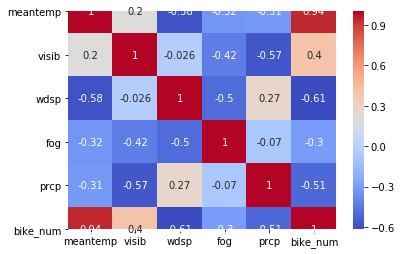

In [23]:
sns.heatmap(df3.corr(), cmap='coolwarm',annot=True);

### 2.3 Przygotuj wykres obrazujący liczbę wypożyczeń i temperaturę

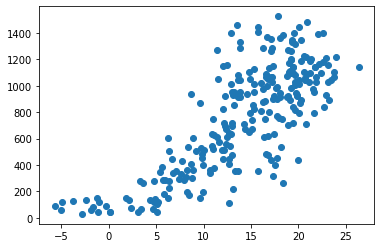

In [25]:
df4 = df[['meantemp','visib','wdsp','fog','prcp']].drop_duplicates().join(df2,how='left')
plt.scatter(df4['meantemp'], df4['bike_num']);